Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes

1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [5]:
cars = pd.read_csv('ToyotaCorolla - MLR.csv')
cars

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [6]:
cars.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [7]:
cars.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [8]:
cars.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [9]:
cars.sample(5)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
684,8950,68,101001,Petrol,110,0,1600,5,4,5,1075
396,9950,53,117913,Diesel,69,0,1900,5,4,5,1110
1043,9450,66,15110,Petrol,86,0,1300,5,4,5,1035
204,12950,43,89968,Diesel,69,0,1900,5,4,5,1140
1372,6750,76,57263,Petrol,110,0,1600,3,4,5,1050


In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [11]:
cars.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [12]:
cars[cars.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [13]:
cars.corr

<bound method DataFrame.corr of       Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2   

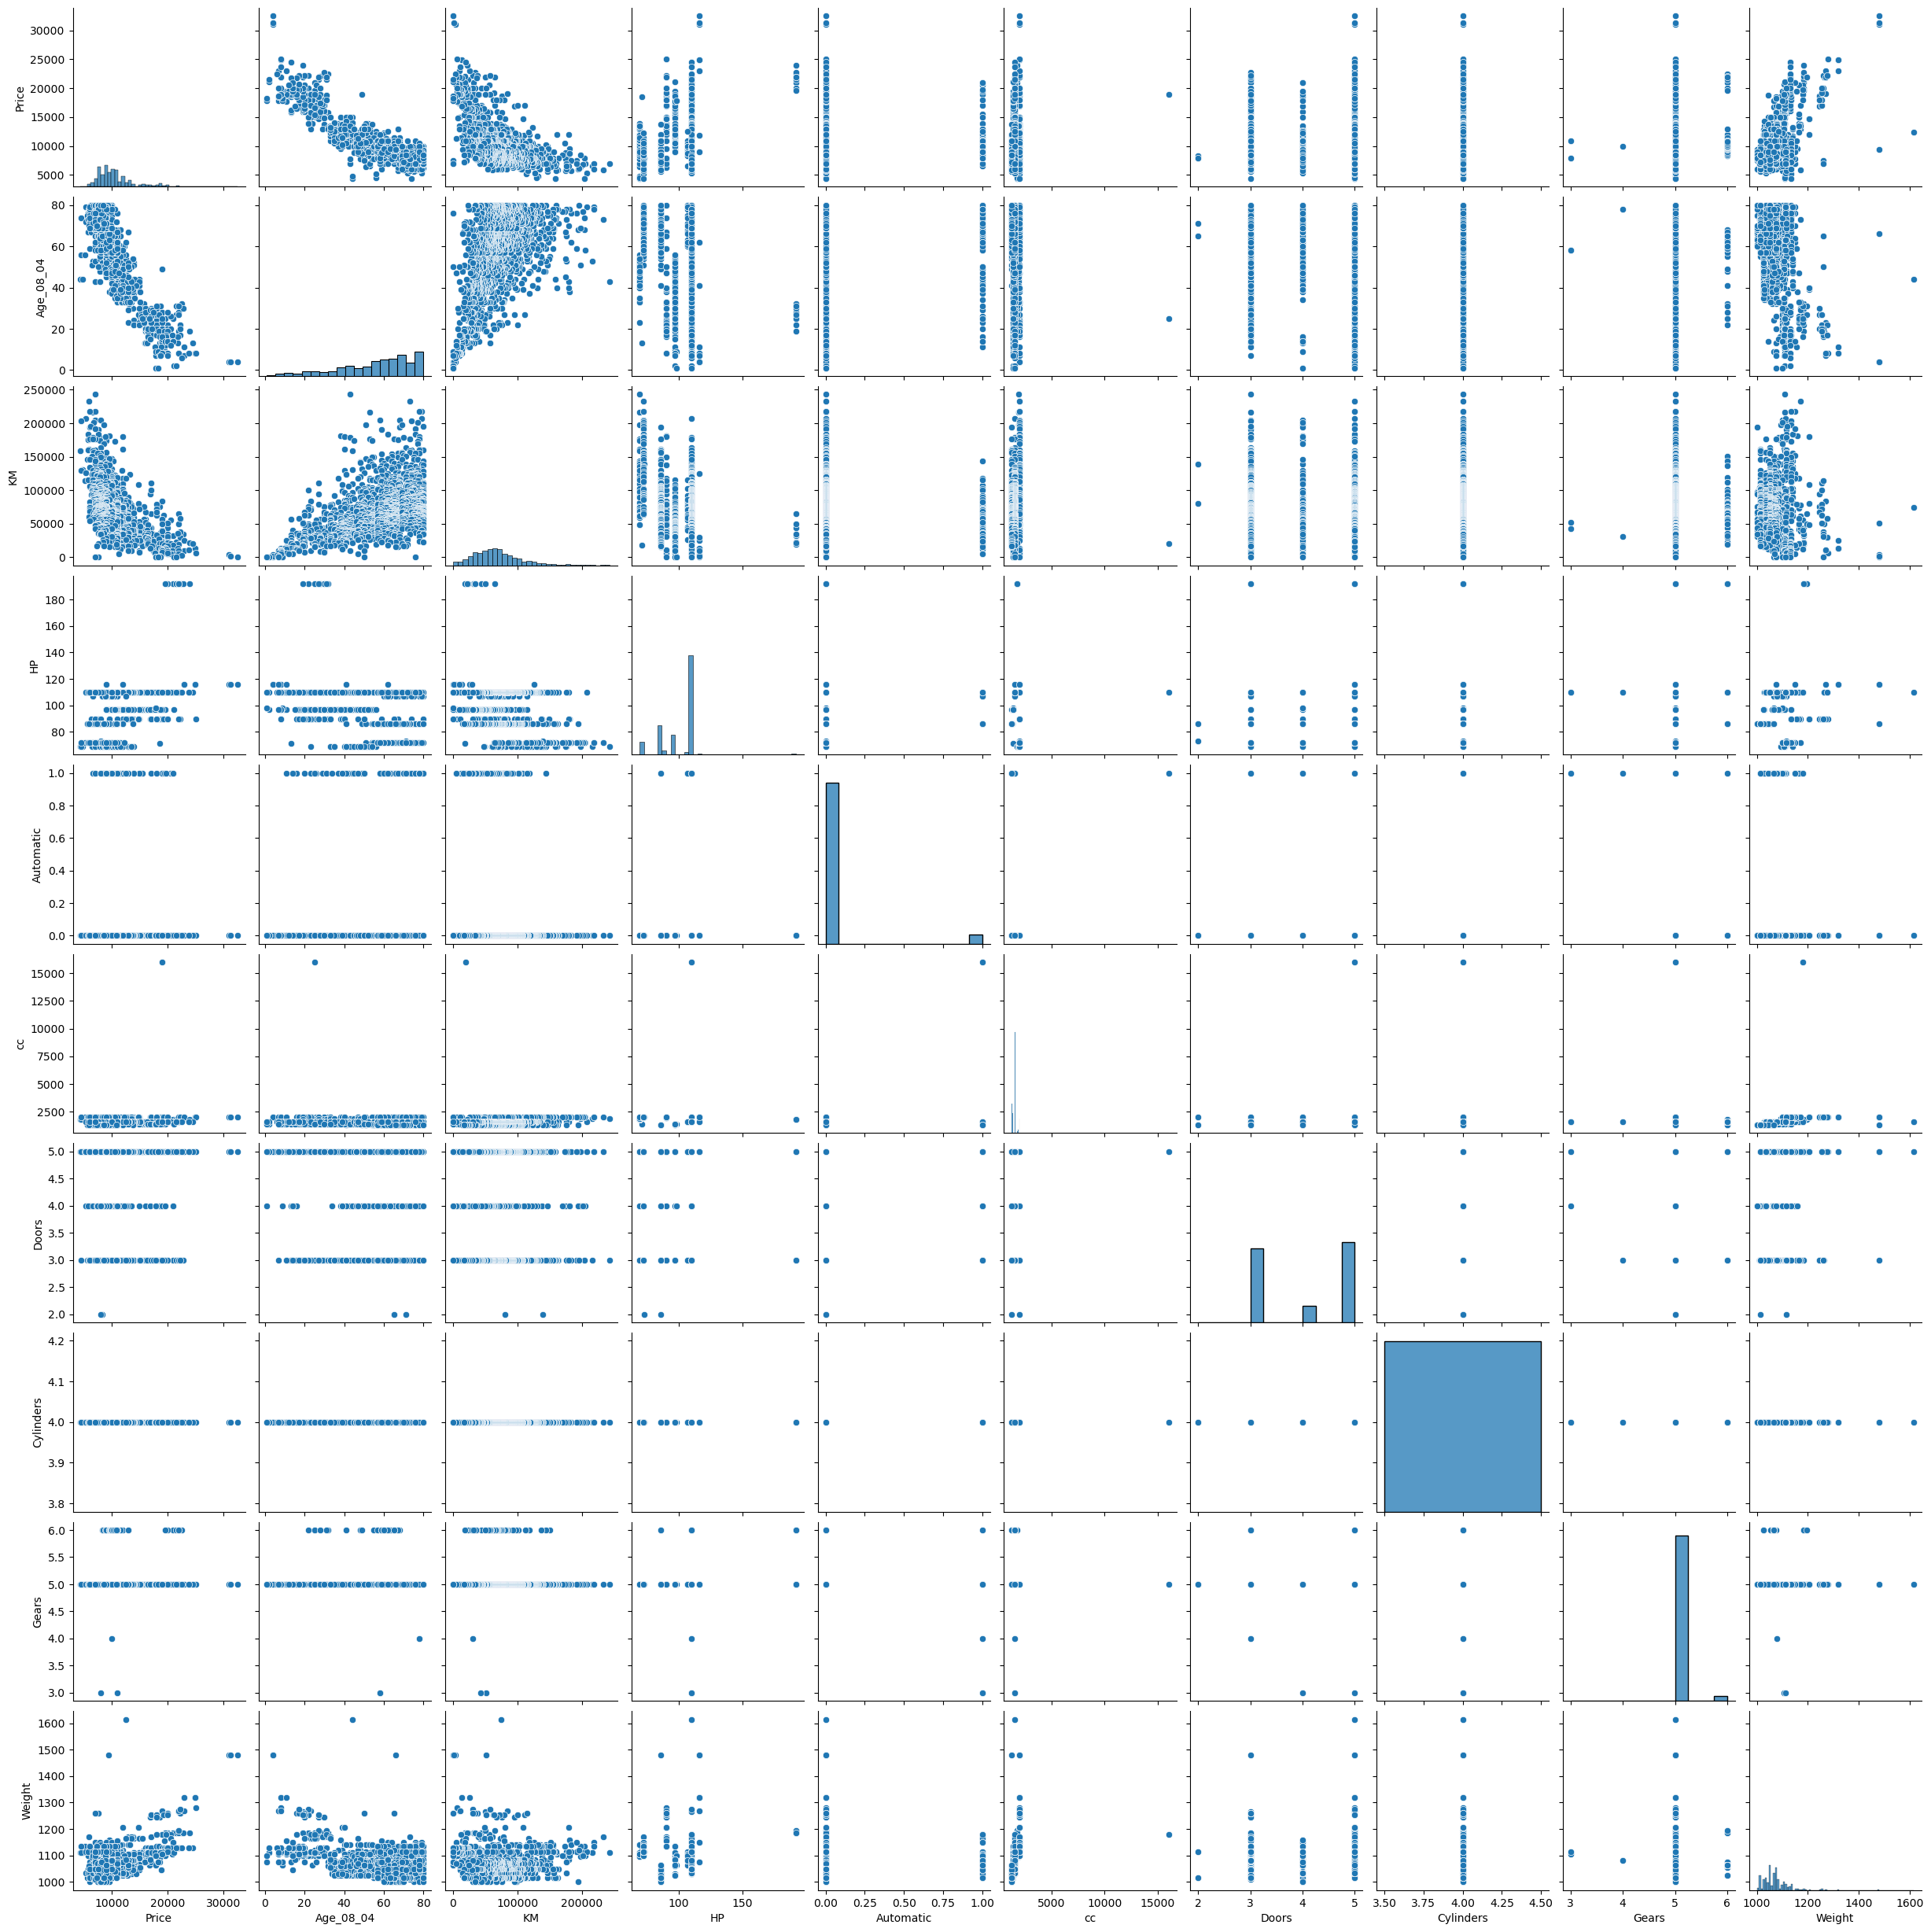

In [14]:
sns.pairplot(cars)
plt.show()

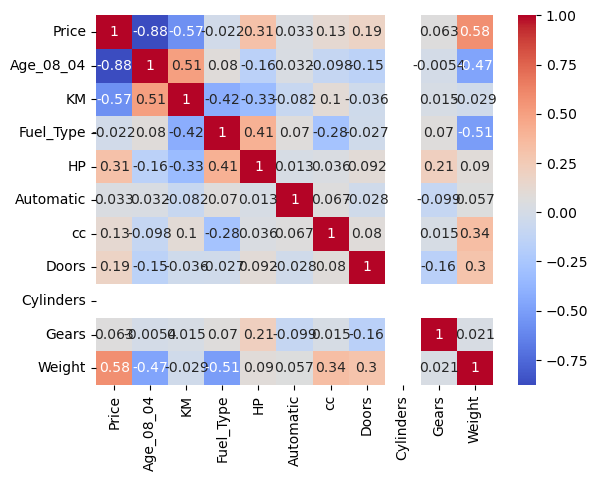

In [64]:
sns.heatmap(cars.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le	= LabelEncoder()
cars['Fuel_Type'] = le.fit_transform(cars['Fuel_Type'])

In [20]:
X = cars.drop('Price',	axis=1)
y = cars['Price']

Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [21]:
# TRAIN–TEST SPLIT-------------------------------------------------------------

In [22]:
from sklearn.model_selection	import train_test_split

In [23]:
X = cars.drop('Price', axis=1)
y = cars['Price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1148, 10) (1148,)
Testing set shape: (288, 10) (288,)


Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.

In [26]:
from sklearn.linear_model import LinearRegression
from	sklearn.metrics import mean_squared_error, r2_score

In [27]:
# model 1 All features

In [28]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred1 = model1.predict(X_test)

In [30]:
print("Model 1 Coefficients:", model1.coef_)

Model 1 Coefficients: [-1.21436240e+02 -1.69355966e-02  8.62056431e+02  2.06582831e+01
  2.45196891e+02 -7.35153881e-02 -3.62796477e+01  2.27373675e-13
  5.30282040e+02  2.35106426e+01]


In [31]:
# model 2:Without Doors features

In [32]:
X_train2	= X_train.drop('Doors', axis=1)
X_test2	= X_test.drop('Doors', axis=1)	

In [33]:
model2 = LinearRegression()
model2.fit(X_train2, y_train)

LinearRegression()

In [34]:
y_pred2	= model2.predict(X_test2)

In [35]:
print("Model 2	Coefficients:", model2.coef_)

Model 2	Coefficients: [-1.21461006e+02 -1.70095066e-02  8.39612057e+02  2.06134883e+01
  2.57226821e+02 -7.28862869e-02  7.95807864e-13  5.66624645e+02
  2.32190680e+01]


In [36]:
# Model 3: Without Doors and FuelType features

In [38]:
X_train3 = X_train2.drop('Fuel_Type', axis=1)
X_test3 = X_test2.drop('Fuel_Type', axis=1)

In [39]:
model3 = LinearRegression()
model3.fit(X_train3, y_train)

LinearRegression()

In [48]:
y_pred3	= model3.predict(X_test3)

In [49]:
print("Model 3 Coefficients:", model3.coef_)

Model 3 Coefficients: [-1.20774179e+02 -1.99874563e-02  2.74765199e+01  3.69332474e+02
 -1.13871792e-01 -1.25055521e-12  6.19161602e+02  1.98851890e+01]


Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.


In [50]:
print("Model 1 MSE:", mean_squared_error(y_test, y_pred1))


Model 1 MSE: 1969469.9253538358


In [51]:
print("Model 1 R2:", r2_score(y_test, y_pred1))


Model 1 R2: 0.8523944320468289


In [52]:
print("MSE:", mean_squared_error(y_test, y_pred2))


MSE: 2095592.563357347


In [55]:
print("R2:", r2_score(y_test, y_pred2))


R2: 0.8429419375585386


In [54]:
print("MSE:", mean_squared_error(y_test, y_pred3))


MSE: 1969469.9253538358


In [56]:
print("R2:", r2_score(y_test, y_pred3))

R2: 0.8523944320468289


Apply Lasso and Ridge methods on the model.


In [57]:
from sklearn.linear_model import Lasso, Ridge


In [58]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [59]:
y_pred_lasso = lasso_model.predict(X_test)


In [60]:
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))


Lasso MSE: 2096722.1822062011


In [61]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)


Ridge(alpha=0.1)

In [62]:
y_pred_ridge = ridge_model.predict(X_test)

In [63]:
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))

Ridge MSE: 2096694.7223460218
